# Visualizing Scientific Data 

The global land temperature dataset contains hundreds of thousands of measurements. Discovering patterns in this data can very difficult. However, it becomes a lot easier if we visualize it.

**Import Numpy and Pandas**

In [1]:
import pandas as pd
import numpy as np

The are many Python libraries to visualize data but Matplotlib is a great one to start.

In [34]:
import matplotlib.pyplot as plt

We will use the same dataset as before which contains temperatures from cities all over the world going back to the mid-1800's. Let's see how temperatures have changed over the years.

In [2]:
data = pd.read_csv("../data/GlobalLandTemperaturesByMajorCity.csv")
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [8]:
temps = data[['dt', 'AverageTemperature', 'City', 'Country']]
temps.columns = ['date','ave_temp', 'city', 'country']

### Convert the Date to a datetime, and change that to be the index

In [9]:
temps.index = pd.to_datetime(temps['date'])
temps.head()

,date,ave_temp,city,country
date,,,,
1849-01-01,1849-01-01,26.704,Abidjan,Côte D'Ivoire
1849-02-01,1849-02-01,27.434,Abidjan,Côte D'Ivoire
1849-03-01,1849-03-01,28.101,Abidjan,Côte D'Ivoire
1849-04-01,1849-04-01,26.140,Abidjan,Côte D'Ivoire
1849-05-01,1849-05-01,25.427,Abidjan,Côte D'Ivoire


### Get the temperatures for Chicago

In [10]:
chicago = temps[temps['city'] == 'Chicago']
chicago.head()

,date,ave_temp,city,country
date,,,,
1743-11-01,1743-11-01,5.436,Chicago,United States
1743-12-01,1743-12-01,NaN,Chicago,United States
1744-01-01,1744-01-01,NaN,Chicago,United States
1744-02-01,1744-02-01,NaN,Chicago,United States
1744-03-01,1744-03-01,NaN,Chicago,United States


### Plot the daily confirmed cases for Illinois

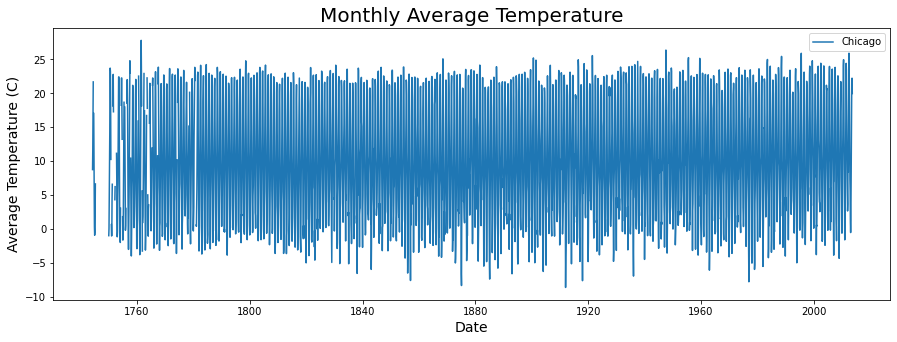

In [11]:
plt.plot(chicago.index, chicago['ave_temp'], label="Chicago")

plt.legend()

plt.title("Monthly Average Temperature", fontsize=20)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Average Temperature (C)", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5) 

### This is a bit messy.  Let's plot the rolling 7-day average.

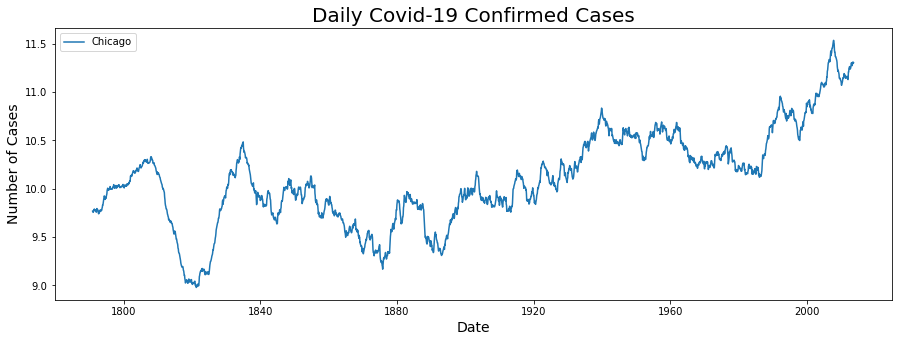

In [29]:
#plt.plot(chicago.index, chicago['ave_temp'], label="Chicago")

plt.plot(chicago.index, chicago['ave_temp'].rolling(120).mean(), label='Chicago')

plt.legend()

plt.title("Daily Covid-19 Confirmed Cases", fontsize=20)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5) 

### To compare Illinois to another state, repeat the process for a different state.  

By making the variable `state2` we can easily change the state in one spot and not have to change it the code that follows. We just call "state2".

In [16]:
# Use a variable for the other state's name, 
# so we can easily change it out later to compare different states.

city2 = "New York"
city2_temps = temps[temps['city'] == city2]

### Add state2 to the same plot as the Illinois numbers

We can use the same technique for the window size of the rolling mean.

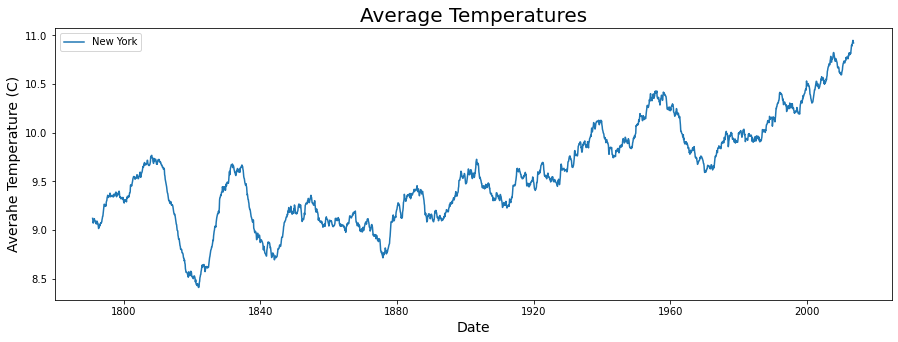

In [33]:
#plt.plot(temps['ave_temp'].rolling(window_size).mean())

#plt.plot(city2_temps.index, city2_temps['ave_temp'], label=city2)

window_size = 120

# add a label and plot for rolling mean for state2
plt.plot(city2_temps['ave_temp'].rolling(window_size).mean(), label=city2)


plt.legend()

plt.title("Average Temperatures", fontsize=20)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Averahe Temperature (C)", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5) 

### We can do the same thing for deaths, by changing 'Confirmed' to 'Deaths' in the plot lines.

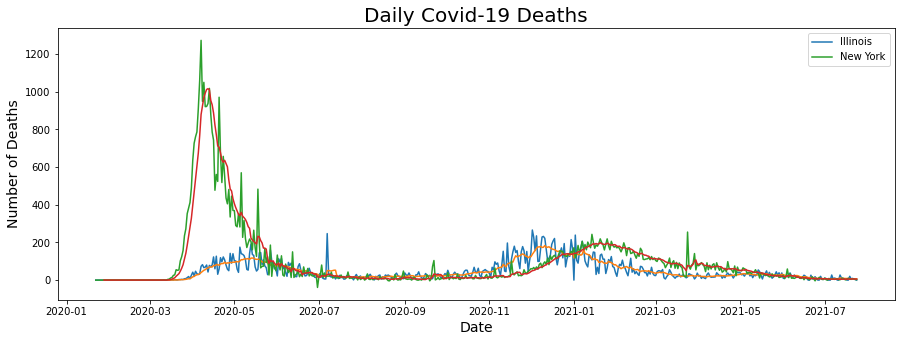

In [33]:
plt.plot(temps.index, temps['Deaths'], label="Illinois")

window_size = 7

plt.plot(temps['Deaths'].rolling(window_size).mean())

# add state2
plt.plot(state2_daily_deaths.index, state2_daily_deaths['Deaths'], label=state2)

# add a label and plot for rolling mean for state2
plt.plot(state2_daily_deaths['Deaths'].rolling(window_size).mean())


plt.legend()

plt.title("Daily Covid-19 Deaths", fontsize=20)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5) 